# Datathon Cajamar UniversityHack 2022 - Cajamar Water Footprint

## Script Exploración - Equipo DPNA

## Imports y leer csv

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')    # Gráficos de mejor calidad

pd.options.display.max_info_rows = 30000000

sns.set_style('darkgrid')

# Tamaño figuras
plt.rcParams["figure.figsize"] = (15,6)

C:\Users\pablo\AppData\Local\Temp/ipykernel_1292/1655791511.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')    # Gráficos de mejor calidad


In [6]:
df = pd.read_csv('data/Modelar_UH2022.txt', sep='|', index_col='ID', parse_dates=True)
df.head()

,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
ID,,,,,
0,2019-06-13 08:34:09,369320,0.0,17,0.0
0,2019-06-13 17:34:10,369403,0.0,2,0.0
0,2019-06-13 18:34:10,369403,0.0,0,0.0
0,2019-06-13 04:34:10,369284,0.0,1,0.0
0,2019-06-13 14:34:10,369356,0.0,28,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21404828 entries, 0 to 2756
Data columns (total 5 columns):
 #   Column             Non-Null Count     Dtype  
---  ------             --------------     -----  
 0   SAMPLETIME         21404828 non-null  object 
 1   READINGINTEGER     21404828 non-null  int64  
 2   READINGTHOUSANDTH  21264772 non-null  float64
 3   DELTAINTEGER       21404828 non-null  int64  
 4   DELTATHOUSANDTH    21264772 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 979.8+ MB


In [8]:
df['SAMPLETIME'] = pd.to_datetime(df.SAMPLETIME)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21404828 entries, 0 to 2756
Data columns (total 5 columns):
 #   Column             Non-Null Count     Dtype         
---  ------             --------------     -----         
 0   SAMPLETIME         21404828 non-null  datetime64[ns]
 1   READINGINTEGER     21404828 non-null  int64         
 2   READINGTHOUSANDTH  21264772 non-null  float64       
 3   DELTAINTEGER       21404828 non-null  int64         
 4   DELTATHOUSANDTH    21264772 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 979.8 MB


In [37]:
df.describe()

,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
count,2.140483e+07,2.126477e+07,2.140483e+07,2.126477e+07
mean,6.052178e+05,3.930737e+00,2.277017e+01,4.228367e+00
std,2.857464e+06,1.496893e+01,1.516794e+03,1.541059e+01
min,-6.407800e+04,0.000000e+00,-5.307340e+05,0.000000e+00
25%,6.368800e+04,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.831570e+05,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.520500e+05,0.000000e+00,9.000000e+00,0.000000e+00
max,5.108976e+07,9.900000e+01,9.499810e+05,9.900000e+01


## ¿Valores perdidos?

### Visualización

Hay muchos contadores a los que les faltan datos. De hecho algunos solo tienen p.e. 4 entradas. También hay 4 con más entradas de las que deberían (8759) (aunque debería ser 8760)

In [157]:
df.groupby(['ID']).size().sort_values()

ID
2756        4
2747        4
2744        4
2743        4
2732        5
        ...  
998      8759
248     34956
1416    34970
292     35054
545     35076
Length: 2747, dtype: int64

<AxesSubplot:ylabel='Count'>

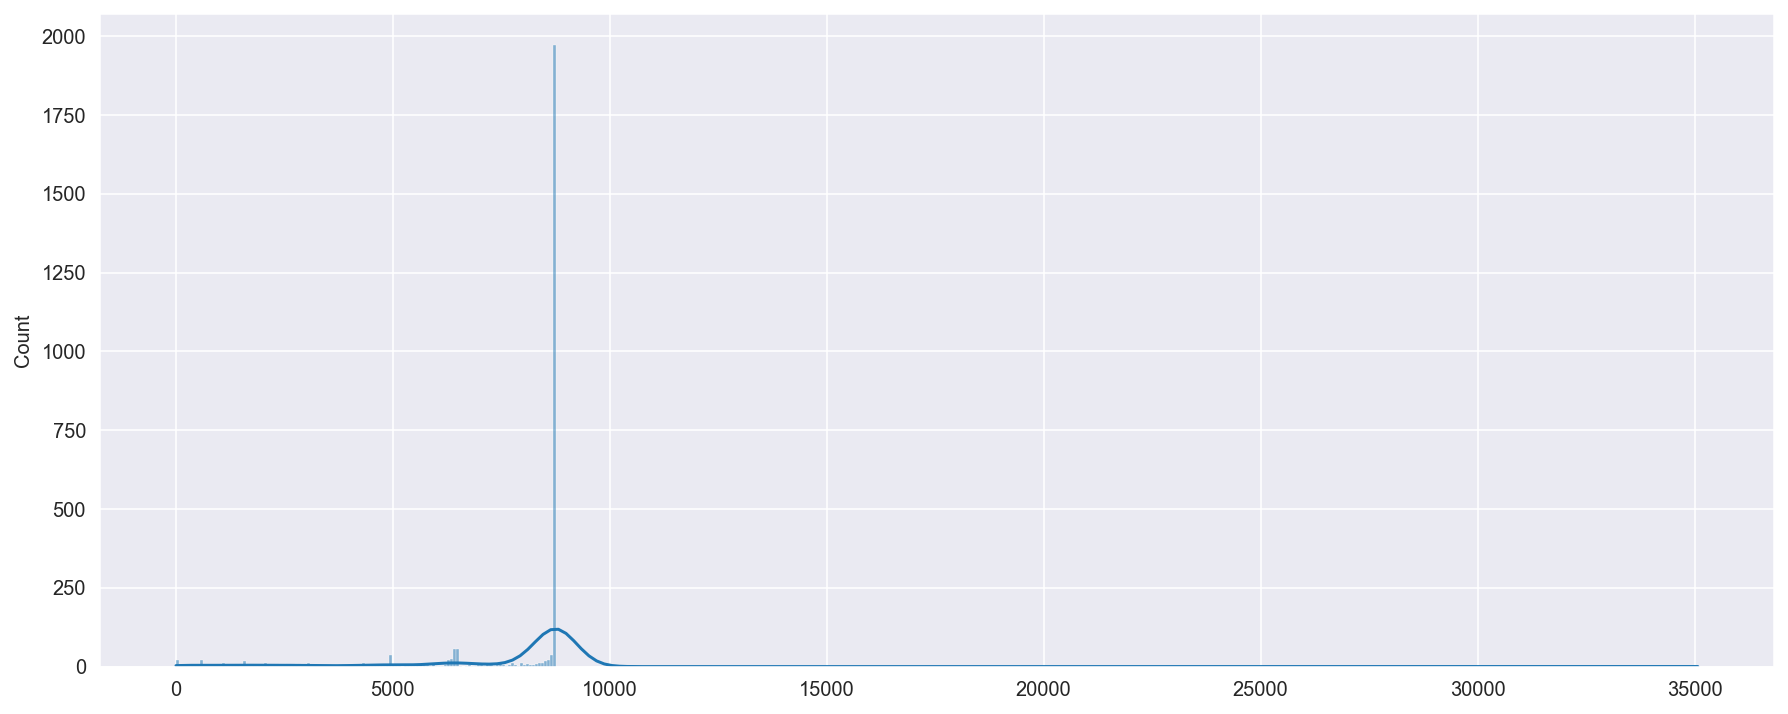

In [29]:
sns.histplot(df.groupby(['ID']).size().sort_values(), bins=500, kde=True)

<AxesSubplot:ylabel='Count'>

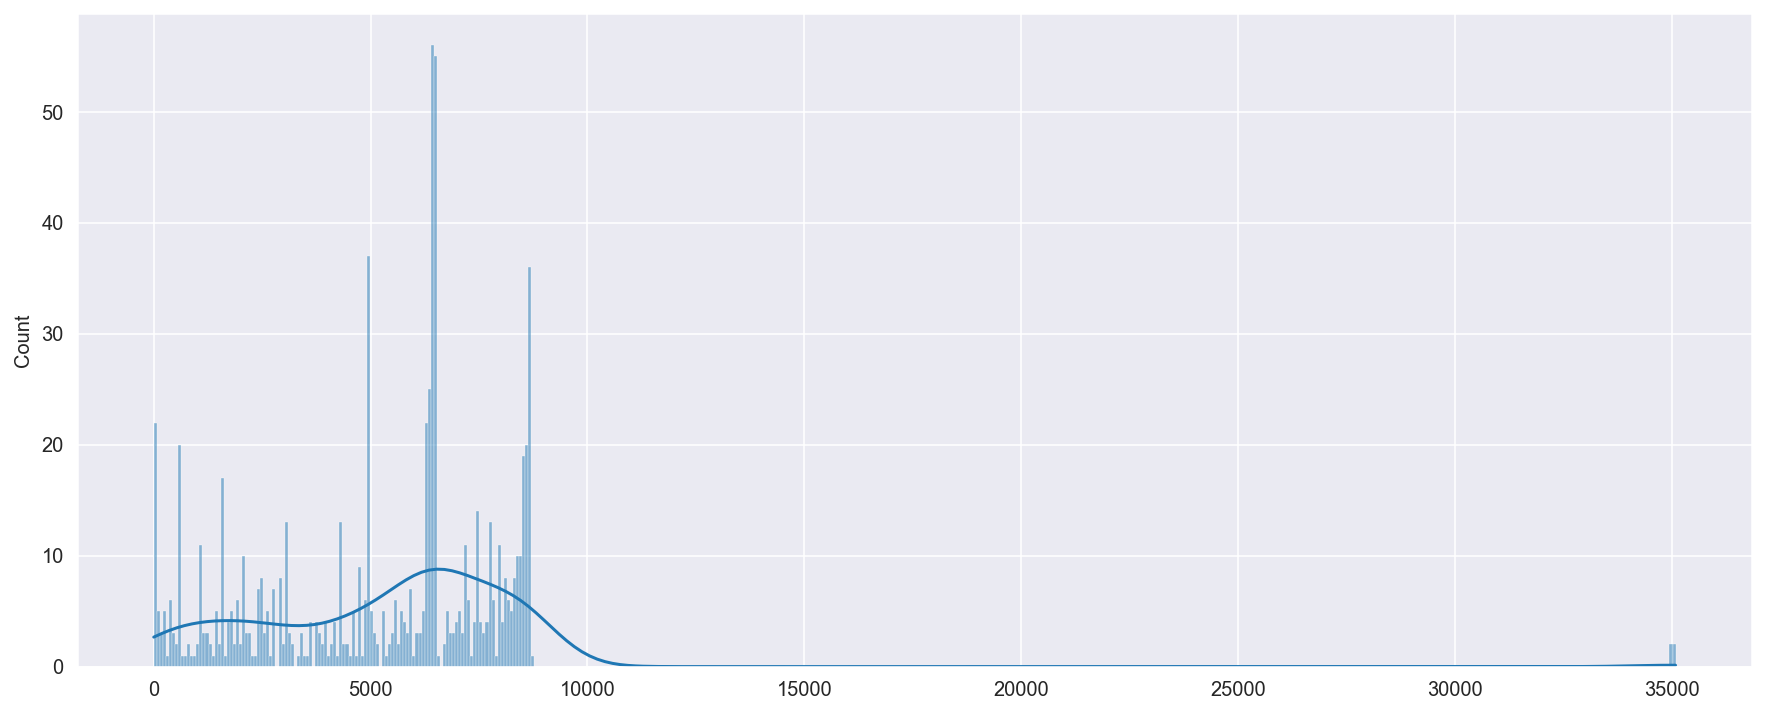

In [30]:
sns.histplot(df.groupby(['ID']).size().sort_values()[df.groupby(['ID']).size().sort_values() != 8759], bins=500, kde=True)

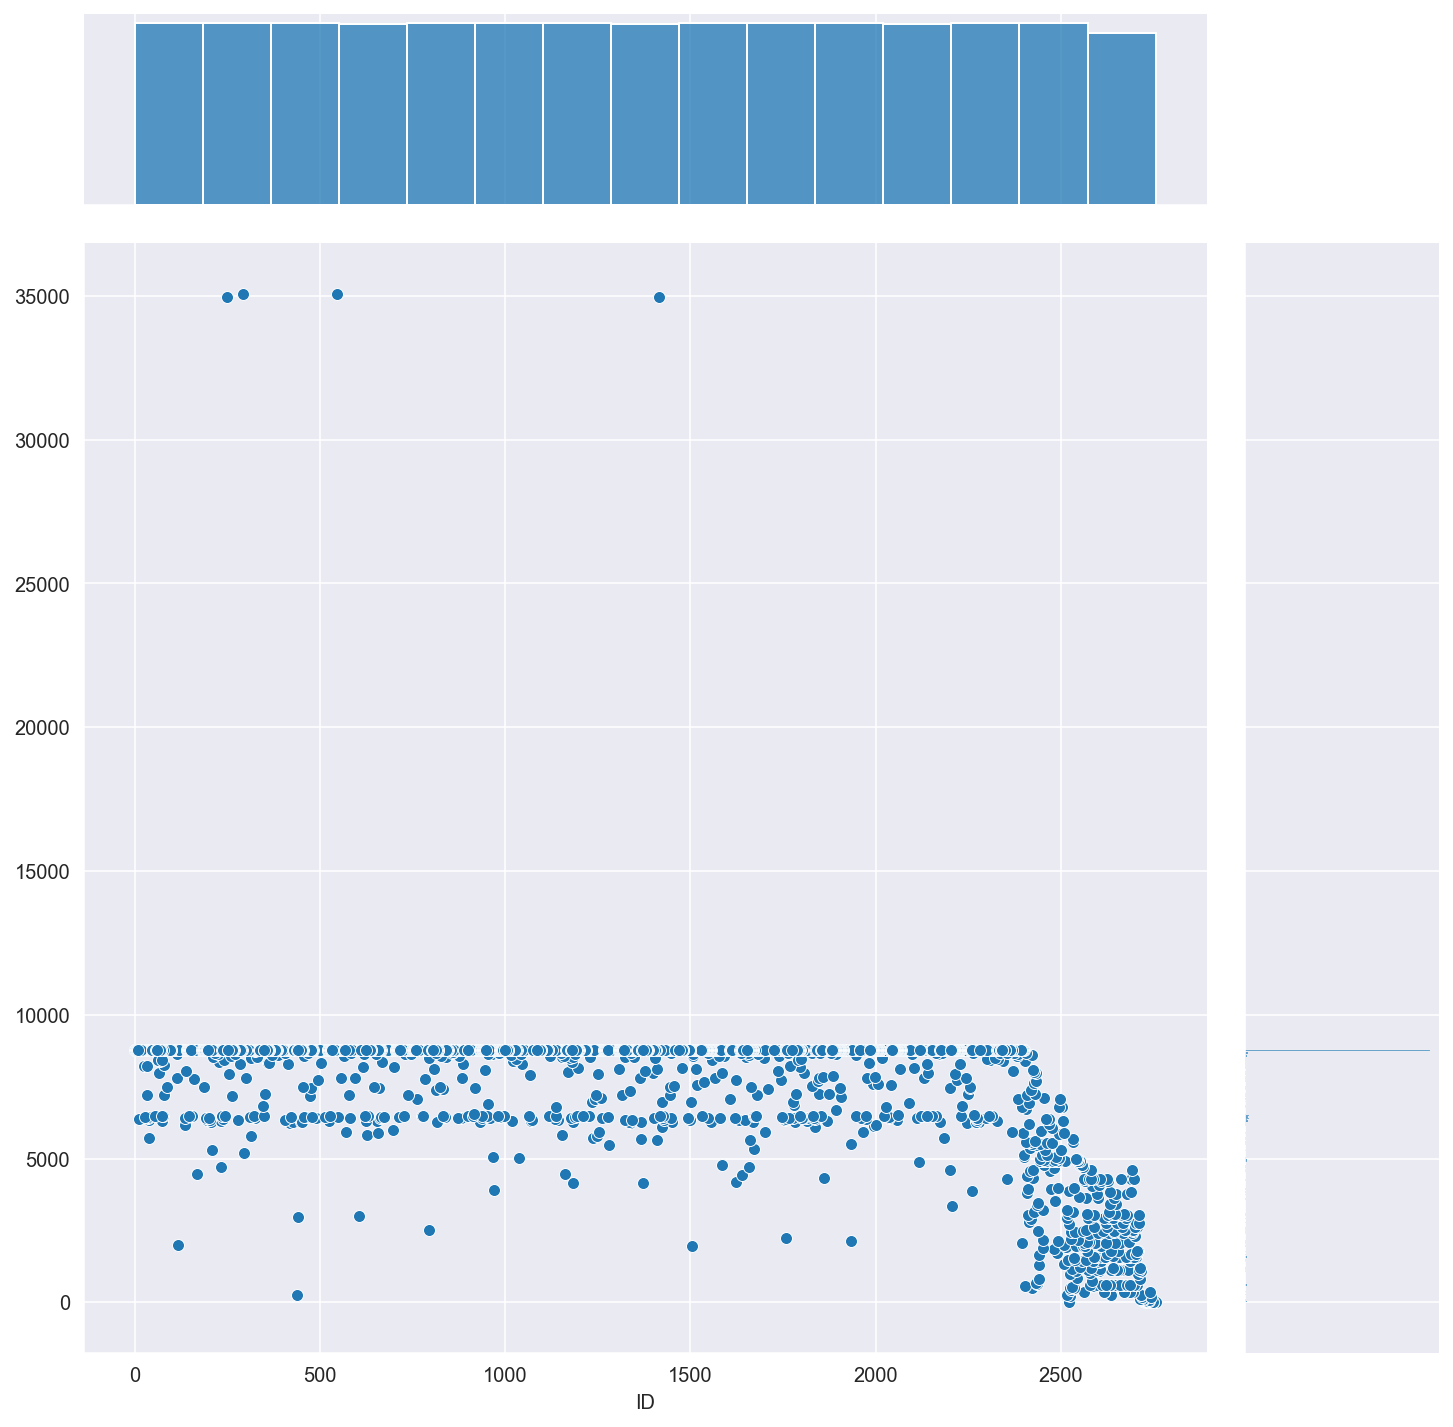

In [37]:
sns.jointplot(data=df.groupby(['ID']).size().sort_values(), kind='scatter', height=10)

La bajada de registros a partir del ID +- 2400 puede ser porque sean los últimos que se han añadido y no tengan registros desde el principio

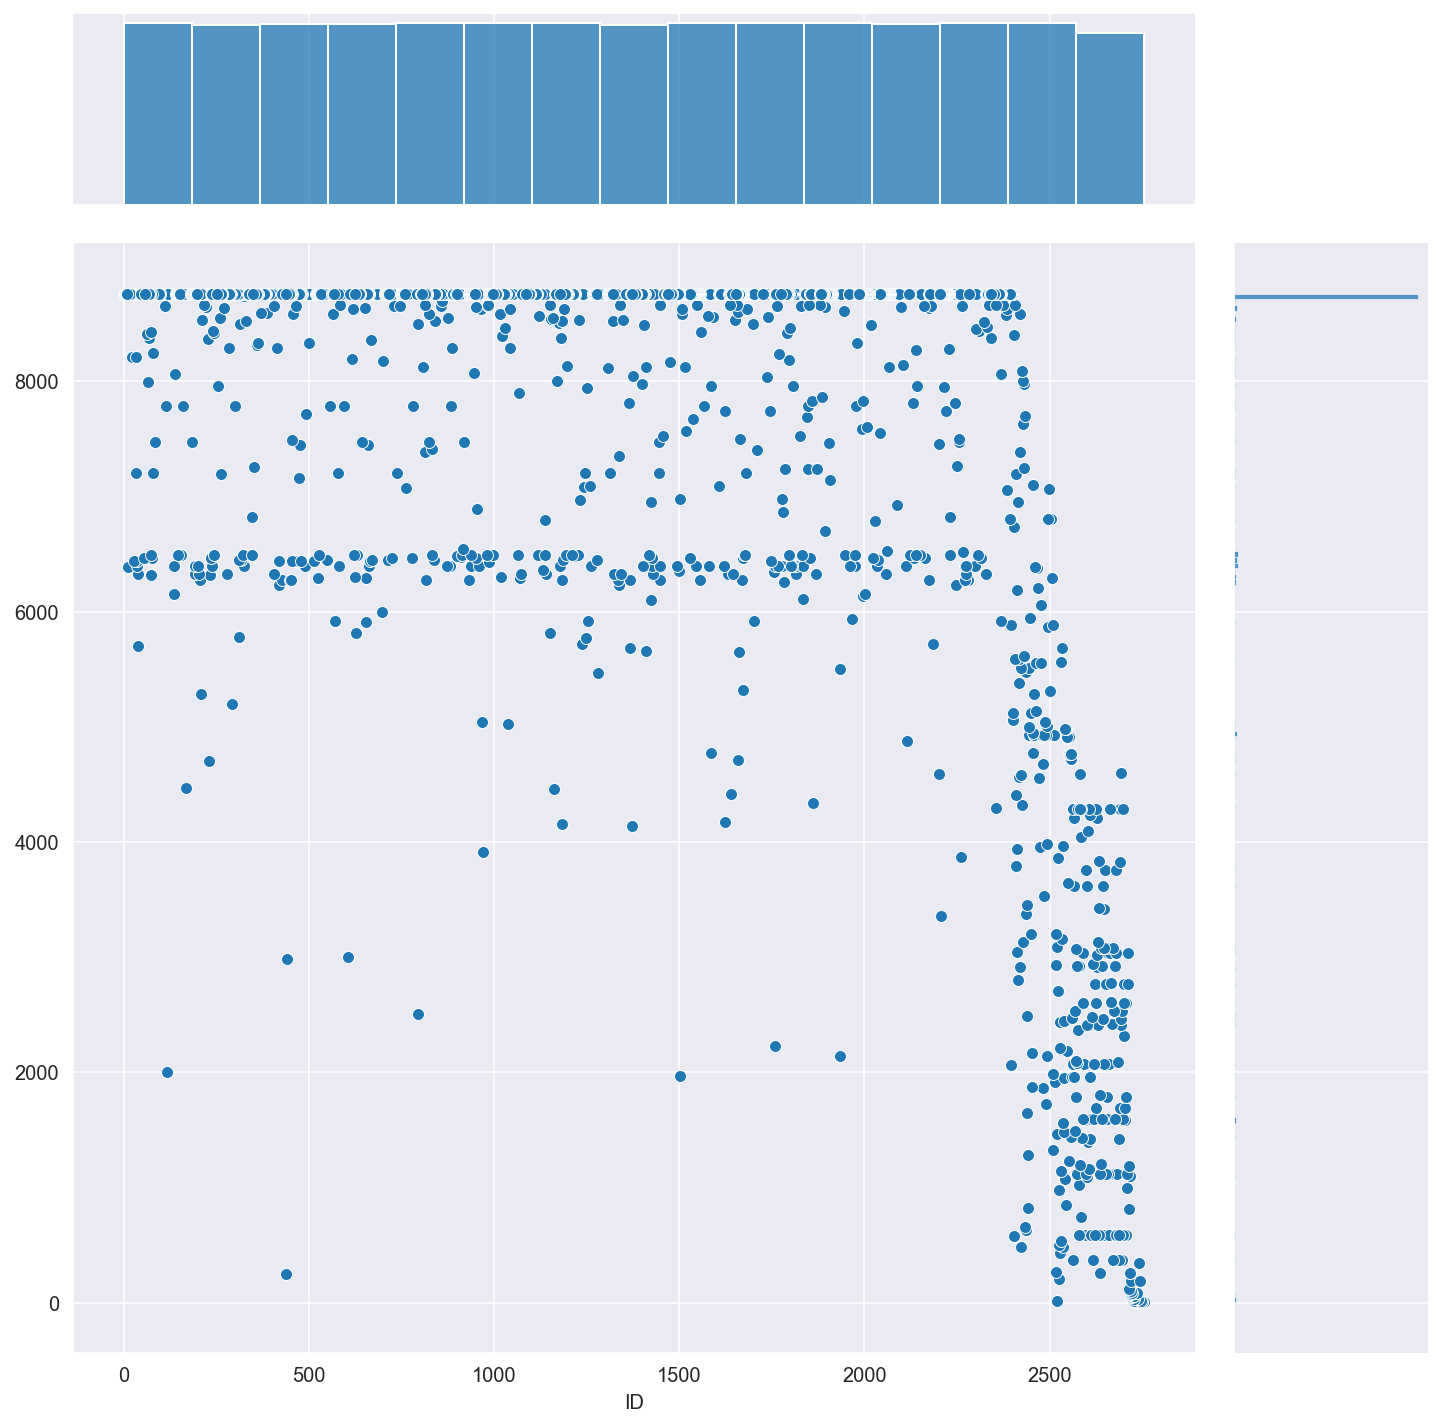

In [36]:
sns.jointplot(data=df.groupby(['ID']).size().sort_values()[:2743], kind='scatter', height=10)

In [102]:
df.groupby(['ID']).size().describe()

count     2747.000000
mean      7792.074263
std       2370.917299
min          4.000000
25%       8421.000000
50%       8759.000000
75%       8759.000000
max      35076.000000
dtype: float64

Parece que los que leen más (ID 248, 1416, 292, 545) es porque leen cada 15 minuos. Además tienen NaN en la parte decimal

In [12]:
df.loc[248]

,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
ID,,,,,
248,2019-06-13 18:30:00,26752630,NaN,0,NaN
248,2019-06-13 04:30:00,26676570,NaN,3290,NaN
248,2019-06-13 16:30:00,26752630,NaN,0,NaN
248,2019-06-13 18:45:00,26752630,NaN,0,NaN
248,2019-06-13 09:45:00,26736300,NaN,2780,NaN
...,...,...,...,...,...
248,2020-01-25 09:30:00,35367090,NaN,0,NaN
248,2020-01-25 16:00:00,35367090,NaN,0,NaN
248,2020-01-25 11:00:00,35367090,NaN,0,NaN


En este caso por ejemplo solo hay datos del verano

In [17]:
df.loc[2530].sort_values('SAMPLETIME')

,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
ID,,,,,
2530,2019-06-29 15:04:57,257019,0.0,0,0.0
2530,2019-06-29 16:04:57,257022,0.0,3,0.0
2530,2019-06-29 17:04:57,257022,0.0,0,0.0
2530,2019-06-29 18:04:57,257042,0.0,20,0.0
2530,2019-06-29 19:00:00,257045,29.0,3,29.0
...,...,...,...,...,...
2530,2019-08-31 18:02:44,265982,0.0,0,0.0
2530,2019-09-24 15:01:53,269306,0.0,0,0.0
2530,2019-09-24 16:01:53,269320,0.0,14,0.0


#### Comprobar para qué meses hay menos valores

2747 ID * 24 horas = 65.928 horas al día

Enero, Marzo, Mayo, Julio, Agosto, Octubre, Diciembre: 31 * 65.928 = 2.043.768 horas

Abril, Junio, Septiembre, Noviembre: 30 * 65.928 = 1.977.840 horas

Febrero: 28 * 65.928 = 1.845.984 horas

In [152]:
df2 = df.groupby(df.SAMPLETIME.dt.to_period('M')).agg("count")["SAMPLETIME"].to_frame()
s = pd.Series(12*['SAMPLETIME'])
df2['Tipo'] = s.values

df3 = df.groupby(df.SAMPLETIME.dt.to_period('M')).agg("count")["SAMPLETIME"].to_frame()
s = pd.Series([1845984,2043768,1977840,2043768,1977840,2043768,2043768,1977840,2043768,1977840,2043768,2043768])
df3['SAMPLETIME'] = s.values
s = pd.Series(12*["ESPERADO"])
df3['Tipo'] = s.values

df2 = pd.concat([df2, df3])
df2["Mes"] = df2.index
df2

,SAMPLETIME,Tipo,Mes
SAMPLETIME,,,
2019-02,1522985,SAMPLETIME,2019-02
2019-03,1701944,SAMPLETIME,2019-03
2019-04,1668736,SAMPLETIME,2019-04
2019-05,1771551,SAMPLETIME,2019-05
2019-06,1729785,SAMPLETIME,2019-06
2019-07,1802685,SAMPLETIME,2019-07
2019-08,1832859,SAMPLETIME,2019-08
2019-09,1760192,SAMPLETIME,2019-09
2019-10,1871522,SAMPLETIME,2019-10


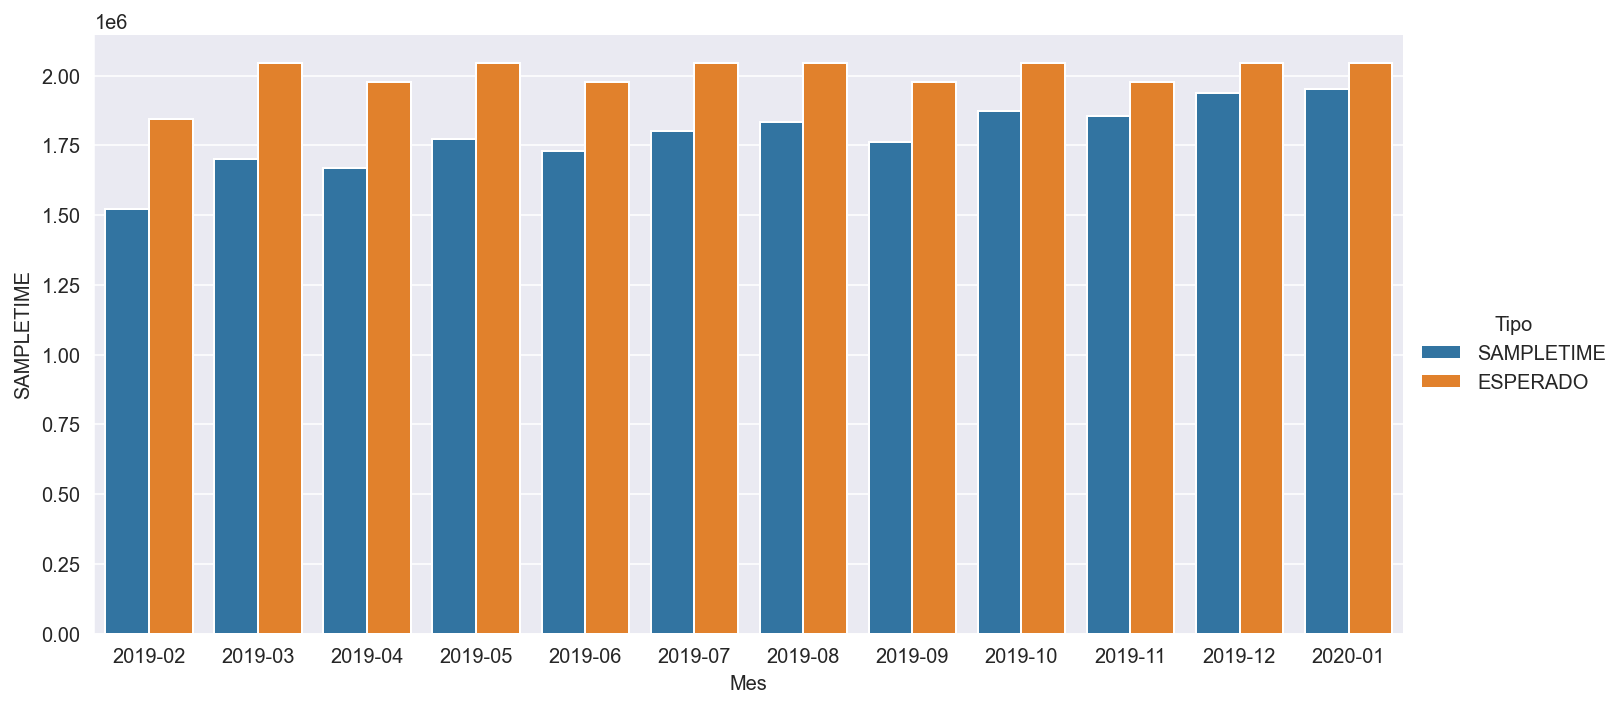

In [149]:
sns.catplot(data=df2, x='Mes', y='SAMPLETIME', kind='bar', hue='Tipo', aspect=2)

A veces no falta simplemente una hora, sino que podemos tener un dato a las 16:00, otro a las 17:30 y otro a las 19:00

## ¿Si sumamos los deltas enteros y decimales conseguimos la resta entre el máx y el min de READINGINTEGER?

En algunos casos el máx READINGTHOUSANDTH es +- 10 y en otros 100. P.e. en ID 0 el max es 8, y sale la cuenta al dividir entre 10

In [20]:
df_prueba = df.loc[0].sort_values('SAMPLETIME')
df_prueba.describe()

,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
count,8759.000000,8759.000000,8759.000000,8759.000000
mean,383306.944857,0.029684,11.784564,0.039959
std,29487.925728,0.421001,20.465775,0.506412
min,331710.000000,0.000000,0.000000,0.000000
25%,357061.500000,0.000000,0.000000,0.000000
50%,384652.000000,0.000000,3.000000,0.000000
75%,408658.500000,0.000000,15.000000,0.000000
max,434966.000000,8.000000,264.000000,8.000000


In [21]:
print(df_prueba["READINGINTEGER"].max() - df_prueba["READINGINTEGER"].min())

print(df_prueba["DELTAINTEGER"].sum())

print((df_prueba["DELTATHOUSANDTH"]/10).sum())

103256
103221
35.0


In [22]:
df_prueba["DELTA"] = df_prueba["DELTAINTEGER"] + df_prueba["DELTATHOUSANDTH"]/10
print(df_prueba["DELTA"].sum())
df_prueba.head(200)

103256.0


,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH,DELTA
ID,,,,,,
0,2019-02-01 00:39:36,331710,0.0,0,0.0,0.0
0,2019-02-01 01:39:36,331710,0.0,0,0.0,0.0
0,2019-02-01 02:39:35,331710,0.0,0,0.0,0.0
0,2019-02-01 03:39:35,331710,0.0,0,0.0,0.0
0,2019-02-01 04:39:35,331710,0.0,0,0.0,0.0
...,...,...,...,...,...,...
0,2019-02-09 03:39:15,333744,0.0,0,0.0,0.0
0,2019-02-09 04:39:15,333744,0.0,0,0.0,0.0
0,2019-02-09 05:39:15,333744,0.0,0,0.0,0.0


Pero p.e. en ID 1 el max es 98, la cuenta debería ser dividir entre 100 pero no da exacto (porque para algunas horas sí habría que hacerlo entre 10)

In [6]:
df_prueba = df.loc[1].sort_values('SAMPLETIME')
df_prueba.describe()

,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
count,8759.000000,8759.000000,8759.000000,8759.000000
mean,8182.789930,4.137459,0.433497,3.580317
std,1204.641522,15.364374,3.008305,12.710341
min,5825.000000,0.000000,0.000000,0.000000
25%,7069.000000,0.000000,0.000000,0.000000
50%,8202.000000,0.000000,0.000000,0.000000
75%,9183.000000,0.000000,0.000000,0.000000
max,10092.000000,98.000000,108.000000,89.000000


In [7]:
print(df_prueba["READINGINTEGER"].max() - df_prueba["READINGINTEGER"].min())

print(df_prueba["DELTAINTEGER"].sum())

print((df_prueba["DELTATHOUSANDTH"]/100).sum())

4267
3797
313.59999999999997


In [13]:
df_prueba["DELTA"] = df_prueba["DELTAINTEGER"] + df_prueba["DELTATHOUSANDTH"]/100
print(df_prueba["DELTA"].sum())
print(df_prueba["READINGINTEGER"].max() - df_prueba["READINGINTEGER"].min())

pd.set_option('display.max_rows', 500)

df_prueba.head()#.iloc[:, [1,4,5]]

4110.6
4267


,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH,DELTA
ID,,,,,,
1,2019-02-01 00:40:17,5825,0.0,0,0.0,0.0
1,2019-02-01 01:40:17,5825,0.0,0,0.0,0.0
1,2019-02-01 02:40:17,5825,0.0,0,0.0,0.0
1,2019-02-01 03:40:16,5825,0.0,0,0.0,0.0
1,2019-02-01 04:40:16,5825,0.0,0,0.0,0.0


In [8]:
df.index.drop_duplicates()

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2739, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2756],
           dtype='int64', name='ID', length=2747)

Primera aproximación a normalizar

In [64]:
ok10 = 0; ok100 = 0; mal = 0

index = set()

for i in tqdm(df.index.drop_duplicates()):
    df_temp = df.loc[i].sort_values('SAMPLETIME')
    
    resta = df_temp["READINGINTEGER"].max() - df_temp["READINGINTEGER"].min()

    df_temp["DELTA"] = df_temp["DELTAINTEGER"] + df_temp["DELTATHOUSANDTH"]/10
    #print(df_temp["DELTA"].sum(), resta)
    if np.abs(df_temp["DELTA"].sum() - resta) < 1:
        ok10 = ok10 + 1
        index.add(i)
    
    else:
        df_temp["DELTA"] = df_temp["DELTAINTEGER"] + df_temp["DELTATHOUSANDTH"]/100
        
        if np.abs(df_temp["DELTA"].sum() - resta) < 1:
            ok100 = ok100 + 1
            index.add(i)
        else:
            mal = mal + 1
    
print("OK 10:",ok10,"OK 100:",ok100,"MAL:",mal)
#OK 10: 423 OK 100: 1 MAL: 2323
#OK 10: 426 OK 100: 20 MAL: 2301


100%|██████████| 2747/2747 [00:04<00:00, 599.69it/s]

OK 10: 426 OK 100: 20 MAL: 2301


### Ver si READINTEGER es rotativo (en algún momento pasa a valer 0)

También si nos quedamos con la columna de reading o de delta

## Crear variables cíclicas con sen/cos para mes, día, hora...

Pensar también qué hacer con el año

## Cada contador tiene horas distintas, que encima son "de su padre y de su madre"

Hay motivos para pensar que la parte de minutos:segundos realmente no influye

### Visualización

In [40]:
df.groupby(['SAMPLETIME']).size().count()

13516088

13516088 valores distintos de fecha/hora. Los tenemos que dejar en 8760

In [41]:
df.groupby(['SAMPLETIME']).size().describe()

count    1.351609e+07
mean     1.583656e+00
std      1.035941e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.101000e+03
dtype: float64

### Convertir tiempos a horas enteras (16:04:57 a 16)

Podemos probar estableciendo directamente los minutos y segundos a 0, a ver qué pasa

In [9]:
df['SAMPLETIME'] = df['SAMPLETIME'].apply(lambda x:x.replace(minute=0,second=0))
df

,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
ID,,,,,
0,2019-06-13 08:00:00,369320,0.0,17,0.0
0,2019-06-13 17:00:00,369403,0.0,2,0.0
0,2019-06-13 18:00:00,369403,0.0,0,0.0
0,2019-06-13 04:00:00,369284,0.0,1,0.0
0,2019-06-13 14:00:00,369356,0.0,28,0.0
...,...,...,...,...,...
2749,2019-10-11 06:00:00,164505,0.0,0,0.0
2756,2019-04-06 05:00:00,349758,0.0,0,0.0
2756,2019-04-06 07:00:00,349770,0.0,12,0.0


In [10]:
df.groupby(['SAMPLETIME']).size().count()

8759

In [11]:
df.groupby(['SAMPLETIME']).size().describe()

count    8759.000000
mean     2443.752483
std       115.401255
min      2248.000000
25%      2324.000000
50%      2438.000000
75%      2571.000000
max      2644.000000
dtype: float64

Podemos ver como el número de registros por horas va aumentado confomre avanza el tiempo. Esto es malo porque 

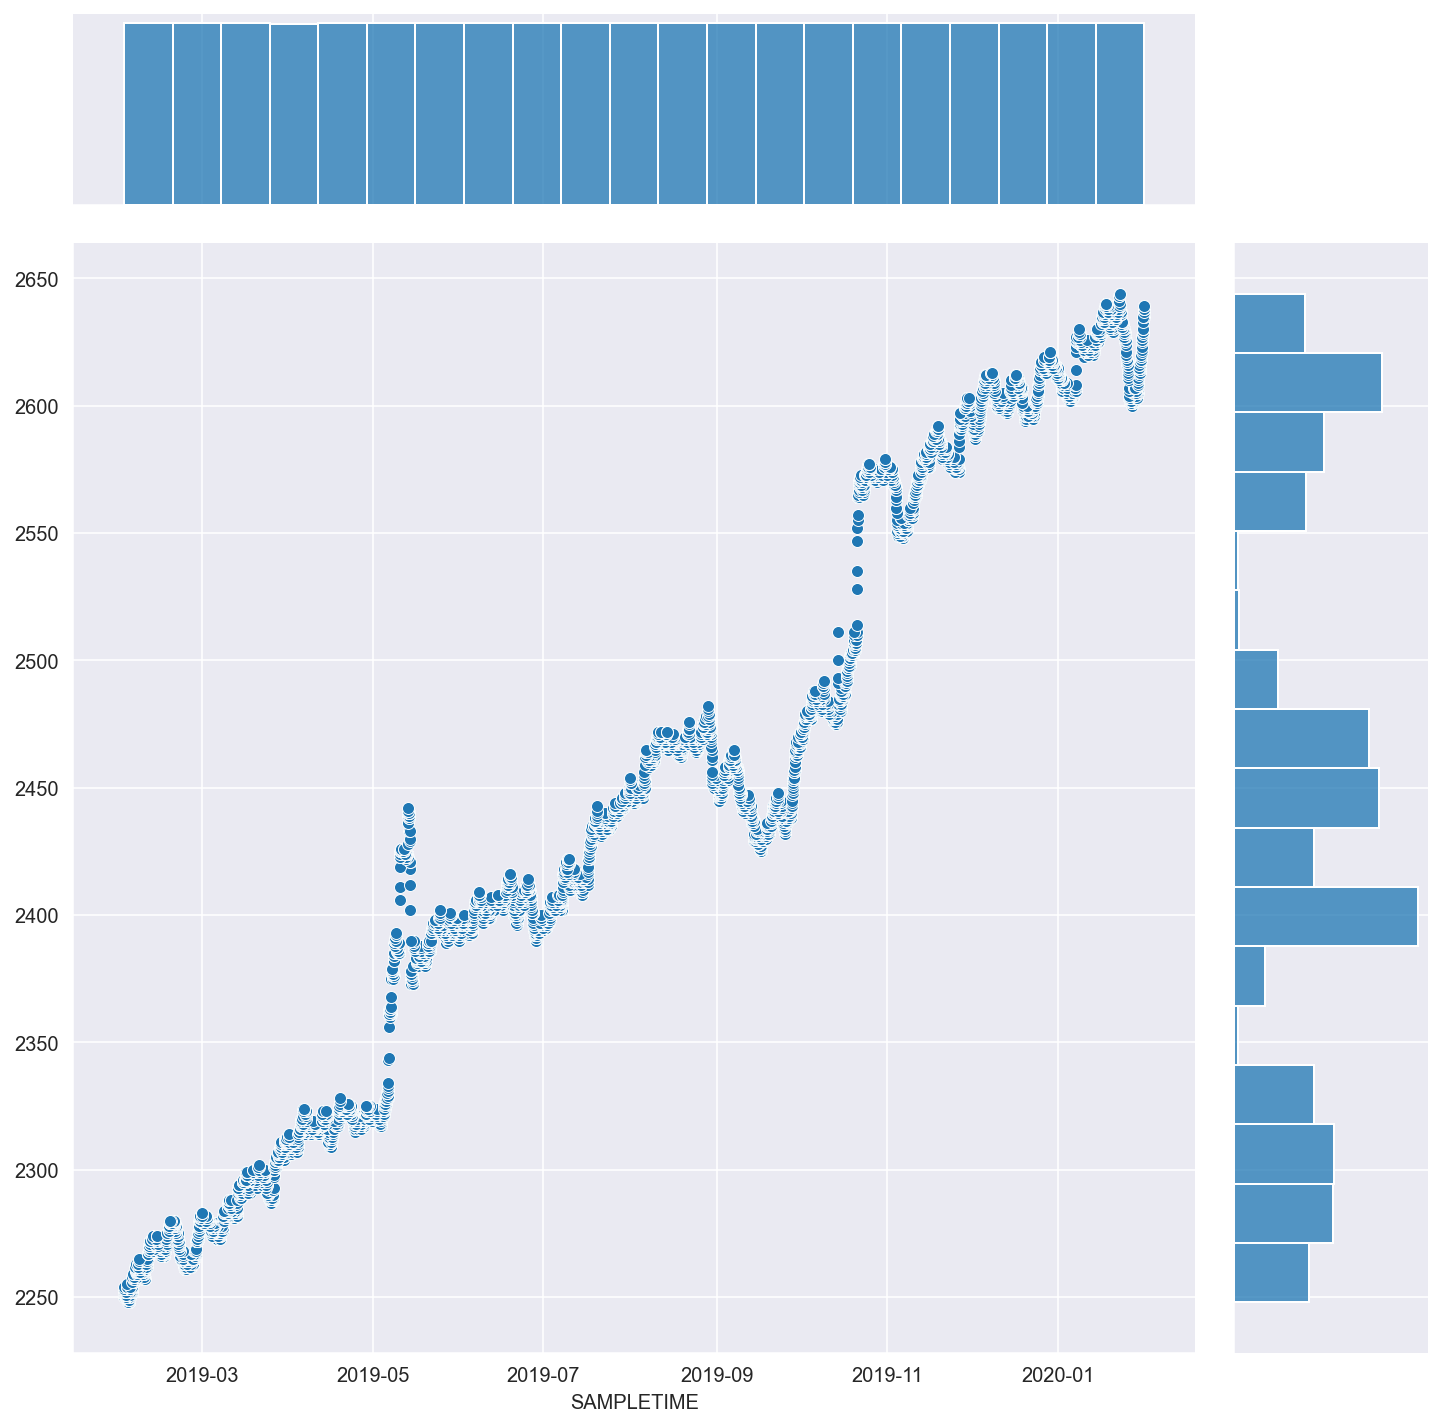

In [27]:
sns.jointplot(data=df.groupby(['SAMPLETIME']).size().sort_values(), kind='scatter', height=10)

## Ubicación

Cuidado, dice litoral de la Comunidad Valenciana pero podría ser Bacelona/Cataluña: "Agbar gestiona el suministro de agua de más de 1 millón de hogares, empresas y administraciones en más de 250 municipios de Cataluña y Baleares."

## Añadir día de la semana, o si es laboral o no